# **Prova P2**

Testar modelos de classificação das imagens com o dataset CIFAR100 e CNN.

In [1]:
!pip install keras.utils 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=17df9b6201beae413d85ad33602f7d5cdf173a34b49161b03b29284b87c5a7c6
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


In [2]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Bibliotecas:
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Activation, Dropout
from keras.optimizers import adam_v2
from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [5]:
# Dados:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 2s 0us/step


In [6]:
# Tamanho dos dados:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [7]:
to_categorical(y_train)[0, :].shape # número de categorias

(100,)

In [8]:
X_train[0, :].shape # imagem shape

(32, 32, 3)

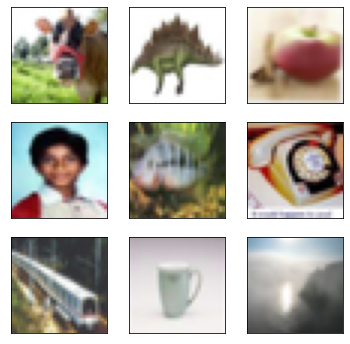

In [9]:
# Visualizando algumas imagens:
def visualize_random_images(images):
    plt.figure(figsize=(6, 6))
    for ind, img in enumerate(images[:9, :]):
        plt.subplot(int("33%d" % (ind + 1)))
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
    plt.show()
    
visualize_random_images(X_train)

In [10]:
# Modelo 1:
model = Sequential()
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='softmax'))

Epoch 1/8
1563/1563 [==============================] - 97s 61ms/step - loss: 3.7131 - acc: 0.1430 - val_loss: 3.2958 - val_acc: 0.2173
Epoch 2/8
1563/1563 [==============================] - 90s 57ms/step - loss: 3.0658 - acc: 0.2598 - val_loss: 3.0483 - val_acc: 0.2653
Epoch 3/8
1563/1563 [==============================] - 87s 56ms/step - loss: 2.7881 - acc: 0.3169 - val_loss: 2.8389 - val_acc: 0.3059
Epoch 4/8
1563/1563 [==============================] - 89s 57ms/step - loss: 2.5955 - acc: 0.3554 - val_loss: 2.6905 - val_acc: 0.3455
Epoch 5/8
1563/1563 [==============================] - 88s 57ms/step - loss: 2.4552 - acc: 0.3846 - val_loss: 2.7724 - val_acc: 0.3283
Epoch 6/8
1563/1563 [==============================] - 89s 57ms/step - loss: 2.3447 - acc: 0.4064 - val_loss: 2.6530 - val_acc: 0.3445
Epoch 7/8
1563/1563 [==============================] - 90s 57ms/step - loss: 2.2527 - acc: 0.4267 - val_loss: 2.6090 - val_acc: 0.3549
Epoch 8/8
1563/1563 [==============================] - 

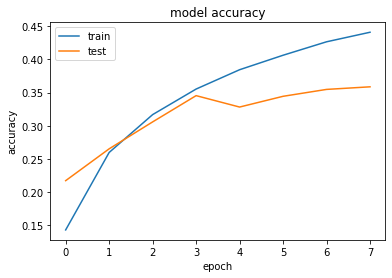

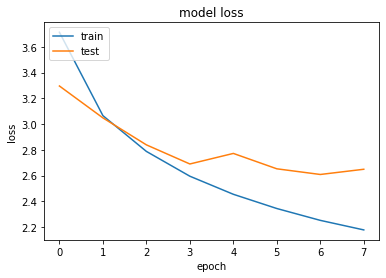

In [11]:
oh = OneHotEncoder(sparse=False) #codificação de recursos categóricos como uma matriz numérica one-hot
oh.fit(y_train)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) # Otimizador Adam e 8 épocas

history = model.fit(X_train/255., oh.transform(y_train), epochs=8, batch_size=32,
          validation_data=(X_test/255., oh.transform(y_test)))

model.summary()

# listando todos os dados do histórico
print(history.history.keys())
# resume o histórico para precisão
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# resume o histórico de perdas
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
# Modelo 2: Utilizando SGD
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(X_train.shape[1:])))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [13]:
history = model.fit(X_train/255., to_categorical(y_train), epochs=15, batch_size=32,
          validation_data=(X_test/255., to_categorical(y_test))) # mais épocas

print(history.history.keys())
# accuracy:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# loss:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/15
1563/1563 [==============================] - 255s 163ms/step - loss: 4.2627 - accuracy: 0.0498 - val_loss: 3.8252 - val_accuracy: 0.1162
Epoch 2/15
1563/1563 [==============================] - 253s 162ms/step - loss: 3.7315 - accuracy: 0.1253 - val_loss: 3.4173 - val_accuracy: 0.1900
Epoch 3/15
1563/1563 [==============================] - 261s 167ms/step - loss: 3.4011 - accuracy: 0.1847 - val_loss: 3.0554 - val_accuracy: 0.2615
Epoch 4/15
1563/1563 [==============================] - 264s 169ms/step - loss: 3.1720 - accuracy: 0.2268 - val_loss: 2.8893 - val_accuracy: 0.2947
Epoch 5/15
1563/1563 [==============================] - 264s 169ms/step - loss: 3.0036 - accuracy: 0.2580 - val_loss: 2.8174 - val_accuracy: 0.2981
Epoch 6/15
1563/1563 [==============================] - 263s 169ms/step - loss: 2.8703 - accuracy: 0.2868 - val_loss: 2.7100 - val_accuracy: 0.3297
Epoch 7/15
1563/1563 [==============================] - 263s 168ms/step - loss: 2.7750 - accuracy: 0.3042 - val_

KeyError: ignored

Foram testados 2 modelos, trocando os parâmetros entre eles como: otimizador,número de épocas e número de camadas.

**Referências:** https://www.youtube.com/watch?v=fM4gg8K7CWc, https://olaralex.com/cnn-on-cifar100/, https://www.kaggle.com/code/vineelpunna/cnn-cifar100-r2/notebook, https://www.kaggle.com/code/clarillapanilla/cifar-100-cnn/notebook, https://shaktiwadekar.medium.com/evaluate-robustness-of-convolutional-neural-networks-cnns-with-cifar100-c-and-cifar10-c-datasets-15ab3592f2fa, https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html